# Peignes

On considère des arbres binaires stricts non vides dont les nœuds internes ne sont pas étiquetés et les feuilles sont étiquetées par des entiers. On utilisera donc le type suivant :

In [ ]:
type arbre =
   |Feuille of int
   |Noeud of arbre * arbre ;;

On dit qu'un arbre est un *peigne* si tous les noeuds à l'exception éventuelle de la racine ont au moins une feuille pour fils. 

On dit qu'un peigne est un *peigne strict* si sa racine a au moins une feuille pour fils, ou s'il est réduit à une feuille. 

On dit qu'un peigne est *rangé* si le fils droit d'un noeud est toujours une feuille. 
Un arbre réduit à une feuille est un peigne rangé.

<figure>
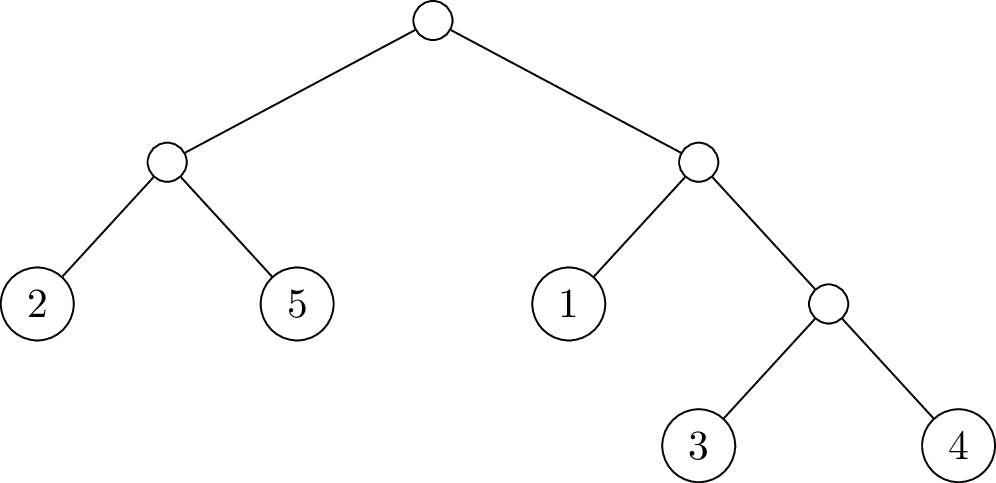
</figure>
<center> <it>Un peigne à cinq feuilles</it></center>

<font size="5">👩🏽‍💻</font> Donner la représentation en OCaml du peigne à $5$ feuilles de la figure 2. On définira pour cela une variable `peigne`.

<font size="5">❓</font>  Est-il strict ? Est-il rangé ?

✍️ 

<font size="5">❓</font> Quelle est la hauteur d'un peigne rangé à $n$ feuilles ? On justifiera la réponse.

✍️ 

La cellule suivante sert à charger les fonctions nécessaires à l'exécution des tests pour les fonctions du TP. N'oubliez donc pas de l'exécuter.

In [ ]:
module Utils = struct
  let fonction_test nom b =
    let () = print_endline (Printf.sprintf "%s : %s" nom (if b then "\027[1m\027[32mOK\027[0m" else "\027[1m\027[31méchec\027[0m")) in b
  let rec test_liste comp pretty_print f lst  =    
    let rec loop lst ok total =
      match lst with
      | [] -> ok, total
      | (t,tt)::q -> loop q (ok + if fonction_test (pretty_print t) (comp (f t) tt) then 1 else 0) (total + 1) 
    in let ok, total = loop lst 0 0 in print_endline (Printf.sprintf "\027[1m%i/%i tests réussis\027[0m" ok total)    
  let rec test_liste_avec_nom comp f lst = 
    let rec loop lst ok total =
      match lst with
      | [] -> ok, total
      | (nom, t, tt)::q -> loop q (ok + if fonction_test nom (comp (f t) tt) then 1 else 0) (total + 1) 
    in let ok, total = loop lst 0 0 in print_endline (Printf.sprintf "\027[1m%i/%i tests réussis\027[0m" ok total)   
  let uncurry2 f (x,y) = f x y      
  let uncurry3 f (x,y,z) = f x y z
end 

module Test = struct
  let un_peigne_de_test = Noeud (Noeud (Feuille 1, Noeud (Feuille 3, Feuille 4)),                                   Noeud (Feuille 2, Feuille 5))
  let un_peigne_range = Noeud (Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Feuille 1), Feuille 4), Feuille 3)
  let envers = Noeud (Feuille 1, Noeud (Feuille 2,Noeud (Feuille 3,Noeud (Feuille 4,Noeud (Feuille 5,Noeud (Feuille 6,Feuille 7))))))      
  let un_arbre = Noeud (Noeud (Feuille 1,Noeud (Feuille 3,Feuille 4)),Noeud (Noeud (Feuille 2,Feuille 5),Noeud(Feuille 6,Feuille 7)))
  let un_autre_arbre = Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Noeud(Feuille 6, Feuille 7)),Feuille 2)
  let presque_range = Noeud (Noeud (Feuille 1, Noeud (Feuille 2, Feuille 3)),Feuille 4)
  let envers_range = Noeud (Noeud (Noeud (Noeud (Noeud (Noeud (Feuille 1, Feuille 2), Feuille 3), Feuille 4), Feuille 5), Feuille 6), Feuille 7)
  let un_autre_peigne = Noeud (Noeud (Feuille 1, Feuille 8), Noeud (Noeud (Feuille 3, Noeud (Feuille 4, Noeud (Feuille 5, Noeud (Feuille 6,Feuille 7)))),
                                  Feuille 2))
  let est_range f =    
    let tests = [("Un peigne", un_peigne_de_test, false);("Un peigne rangé", un_peigne_range, true);("Un peigne", un_peigne_de_test, false);("Un peigne à l'envers", envers, false);("Encore un peigne", Noeud (envers_range, un_peigne_range), false);("Une feuille", Feuille 3 , true);] in        
    Utils.test_liste_avec_nom (=) f tests    
  let est_peigne_strict f =    
    let tests = [("Un peigne", un_peigne_de_test, false);("Un peigne strict", presque_range, true);("Un arbre", un_arbre, false);("Un autre arbre", un_autre_arbre, false);("Une feuille", Feuille 3 , true);] in        
    Utils.test_liste_avec_nom (=)  f tests    
  let est_peigne f =    
    let tests = [("Un peigne", un_peigne_de_test, true);("Un peigne strict", presque_range, true);("Encore un peigne", Noeud (envers_range, un_peigne_range), true);("Un arbre", un_arbre, false);("Un autre arbre", un_autre_arbre, false);("Une feuille", Feuille 3 , true);] in        
    Utils.test_liste_avec_nom (=)  f tests   
  let rotation f =
    let un_peigne_rot = Noeud (Noeud (Noeud (Feuille 1, Noeud (Feuille 3, Feuille 4)), Feuille 5), Feuille 2)
    and un_peigne_rot_bis =   Noeud (Noeud (Noeud (Feuille 1, Noeud (Feuille 3, Feuille 4)), Feuille 2), Feuille 5) in
    let un_autre_peigne = Noeud (Noeud (Feuille 1, Feuille 8), Noeud (Noeud (Feuille 3, Noeud (Feuille 4, Noeud (Feuille 5, Noeud (Feuille 6,Feuille 7)))),Feuille 2))
    and autre_peigne_rot = Noeud (Noeud (Noeud (Feuille 1, Feuille 8), Feuille 2), Noeud (Feuille 3, Noeud (Feuille 4, Noeud (Feuille 5, Noeud (Feuille 6, Feuille 7))))) in
    let tests = [("Un peigne", un_peigne_de_test, [un_peigne_rot;un_peigne_rot_bis]);   ("Un autre peigne", un_autre_peigne, [autre_peigne_rot])] in
    Utils.test_liste_avec_nom List.mem f tests  
  let rangement f =
    let peigne_range = Noeud (Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Feuille 1), Feuille 4), Feuille 3) in
    let peigne_range_bis = Noeud (Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Feuille 1), Feuille 3),Feuille 4) in
    let un_peigne_de_test_range  = Noeud (Noeud (Noeud (Noeud (Feuille 1, Feuille 4), Feuille 3), Feuille 5), Feuille 2) in
    let un_peigne_de_test_range_bis = Noeud (Noeud (Noeud (Noeud (Feuille 1, Feuille 3), Feuille 4), Feuille 2),Feuille 5) in
    let presque_range_range = Noeud (Noeud (Noeud (Feuille 1, Feuille 3), Feuille 2), Feuille 4) in 
    let presque_range_range_bis = Noeud (Noeud (Noeud (Feuille 1, Feuille 2), Feuille 3), Feuille 4) in  
    let envers_range = Noeud (Noeud (Noeud (Noeud (Noeud (Noeud (Feuille 1, Feuille 2), Feuille 3), Feuille 4),Feuille 5), Feuille 6), Feuille 7) in
    let envers_range_bis = Noeud (Noeud (Noeud (Noeud (Noeud (Noeud (Feuille 1, Feuille 2), Feuille 3), Feuille 4),Feuille 5), Feuille 7), Feuille 6) in
    let tests = [("Peigne figure 1", peigne, [peigne_range;peigne_range_bis]); ("Un peigne", un_peigne_de_test, [un_peigne_de_test_range;un_peigne_de_test_range_bis]);("un peigne presque rangé", presque_range, [presque_range_range;presque_range_range_bis]);("un peigne à l'envers", envers, [envers_range;envers_range_bis]);] in
    Utils.test_liste_avec_nom List.mem f tests 
end


<font size="5">👨🏿‍💻</font>   Ecrire une fonction `est_range : arbre -> bool` qui renvoie `true` si l'arbre donné en argument est un peigne rangé.

**Tests personnels**

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.est_range est_range;;

<font size="5"> 👩🏼‍💻</font>   Ecrire une fonction `est_peigne_strict : arbre -> bool` qui renvoie `true` si l'arbre donné en argument est un peigne strict. 

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.est_peigne_strict est_peigne_strict;;

<font size="5">👨🏽‍💻</font>   En déduire une fonction `est_peigne : arbre -> bool` qui renvoie `true` si l'arbre donné en argument est un peigne.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.est_peigne est_peigne;;

On souhaite ranger un peigne donné. Supposons que le fils droit $N$ de sa racine ne soit pas une feuille. 
Notons $A_1$ le sous-arbre gauche de la racine, $f$ l'une des feuilles du noeud $N$ et  $A_2$ l'autre sous-arbre du noeud $N$. 
On va utiliser l'opération de `rotation` qui construit un nouveau peigne où
-  le fils droit de la racine est le sous-arbre $A_2$ ;
- le fils gauche de la racine est un noeud de sous-arbre gauche $A_1$ et de sous-arbre droit la feuille $f$.


<figure>
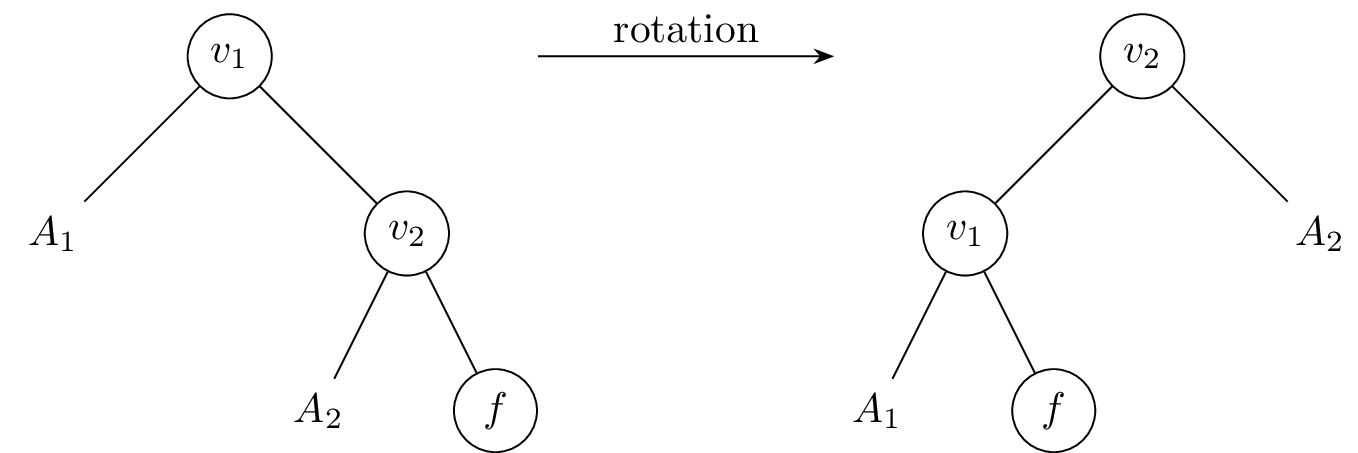
</figure>
<center> <em>Une rotation</em></center>

<font size="5"> 👩‍💻 </font>   Donner la représentation en OCaml du peigne obtenu après une rotation sur le peigne de la figure 2.

In [ ]:
let peigne_apres_rotation = 
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👨🏼‍💻</font>   Écrire une fonction `rotation : arbre -> arbre` qui effectue l'opération décrite ci-dessus. La fonction renverra l'arbre initial si une rotation n'est pas possible.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.rotation rotation;;

<font size="5">👩🏾‍💻</font> En déduire une fonction `rangement : arbre -> arbre` qui range un peigne donné en argument, c'est-à-dire qui renvoie un peigne rangé ayant les mêmes feuilles que celui donné en argument. 

La fonction renverra l'arbre initial si celui-ci n'est pas un peigne.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**

In [ ]:
let () = 
  let rec feuilles a  = 
    match a with
    | Feuille x -> [x]
    | Noeud (fg, fd) -> feuilles fg @ feuilles fd
  in
  let params = [("Peigne figure 1 (propriétés)", peigne);("Un peigne (propriétés)", Test.un_peigne_de_test);("un peigne presque rangé (propriétés)", Test.presque_range);  ("Un peigne à l'envers (propriétés)", Test.envers);("Encore un peigne (propriétés)", Test.un_autre_peigne)] in
  let tests = List.map (fun (s,a) -> (s,a, a)) params in
  print_endline "\027[1m\027[4mVérification des propriétés du peigne obtenu\027[0m"; let test_comp ar a = est_range ar && (List.sort compare (feuilles a) = List.sort compare (feuilles ar)) in Utils.test_liste_avec_nom test_comp rangement tests ; print_newline ();  
  print_endline "\027[1m\027[4mCas d'un arbre n'étant pas un peigne\027[0m"; Utils.test_liste_avec_nom (=) rangement [("Pas un peigne",Test.un_arbre,Test.un_arbre)]; print_newline ();  
  print_endline "\027[1m\027[4mVérification de la cohérence avec l'algorithme sugéré\027[0m"; Test.rangement rangement

<font size="5">❓</font>   Prouver que la fonction `rangement` termine.

✍️ *Votre réponse*